# Simulation of the field measured by a sensor with finite effective area

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from IPython.display import Image
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism, sphere, polyprism
from fatiando.utils import ang2vec, vec2ang
from fatiando.vis import mpl, myv
from fatiando.constants import CM, T2NT

In [3]:
mpl.rc('font', size=14)

In [4]:
import functions as f

### Load data from files

In [5]:
files = ['..\\data\\data0.txt', 
         '..\\data\\data1.txt',
         '..\\data\\data2.txt',
         '..\\data\\data3.txt']

nfiles = len(files)

In [6]:
data = []

for i in range(nfiles):
    data.append(np.loadtxt(files[i]))

In [7]:
mag_true = np.loadtxt('..\\data\\estimate_real.txt')

In [8]:
mean_inc0 = np.mean(mag_true[1:4,1])
mean_inc1 = np.mean(mag_true[5:8,1])
mean_inc2 = np.mean(mag_true[9:12,1])
mean_inc3 = np.mean(mag_true[13:16,1])

mean_dec0 = np.mean(mag_true[1:4,2])
mean_dec1 = np.mean(mag_true[5:8,2])
mean_dec2 = np.mean(mag_true[9:12,2])
mean_dec3 = np.mean(mag_true[13:16,2])

In [9]:
mag_true[0:4,1] = mean_inc0
mag_true[4:8,1] = mean_inc1
mag_true[8:12,1] = mean_inc2
mag_true[12:16,1] = mean_inc3

In [10]:
mag_true[0:4,2] = mean_dec0
mag_true[4:8,2] = mean_dec1
mag_true[8:12,2] = mean_dec2
mag_true[12:16,2] = mean_dec3

### Synthetic sample 

In [11]:
N = 16 # number of prisms forming the sample
M = 3*N # number of parameters to be estimated

Lx = 0.001 # in m
Ly = 0.003 # in m
Lz = Ly  # in m

Nx = 102
Ny = 42

#### Syntetic sample model

In [12]:
sample = f.sample(Lx,Ly,Lz,N, m = mag_true[:,0], inc = mag_true[:,1], dec = mag_true[:,2])

#### Magnetic induction produced by the synthetic sample

In [13]:
h1 = 0.000001*10   #distance (in m) between the planes and the sample surface
h2 = 0.000001*100   #distance (in m) between the planes and the sample surface
h3 = 0.000001*300   #distance (in m) between the planes and the sample surface
h4 = 0.000001*500   #distance (in m) between the planes and the sample surface

h = [h1,h2,h3,h4]

In [14]:
xmin = np.min([data[0][:,0], data[1][:,0], data[2][:,0], data[3][:,0]])
xmax = np.max([data[0][:,0], data[1][:,0], data[2][:,0], data[3][:,0]])
ymin = np.min([data[0][:,1], data[1][:,1], data[2][:,1], data[3][:,1]])
ymax = np.max([data[0][:,1], data[1][:,1], data[2][:,1], data[3][:,1]])

area = [xmin, xmax, ymin, ymax]

In [15]:
Bp = []
Ba = []
for i in range(len(h)):
    x0,y0,z0 = f.coordplane(h[i],Ly,Nx,Ny,area,0,0)
    # Magnetic data measured by a infinitesimal sensor
    Bp.append(f.magnetic_data(x0, y0, z0, sample, 0))
    # Magnetic data measured by a finite sensor
    Ba.append(f.magnetic_data(x0, y0, z0, sample, 0, (10.,10.)))

With the observation points and the synthetic model generated previously, we calculate the magnetic induction produced by the synthetic sample on the four planes.

### Plotting of the observed and theoretical data

C:\Users\Andre_Projeto\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


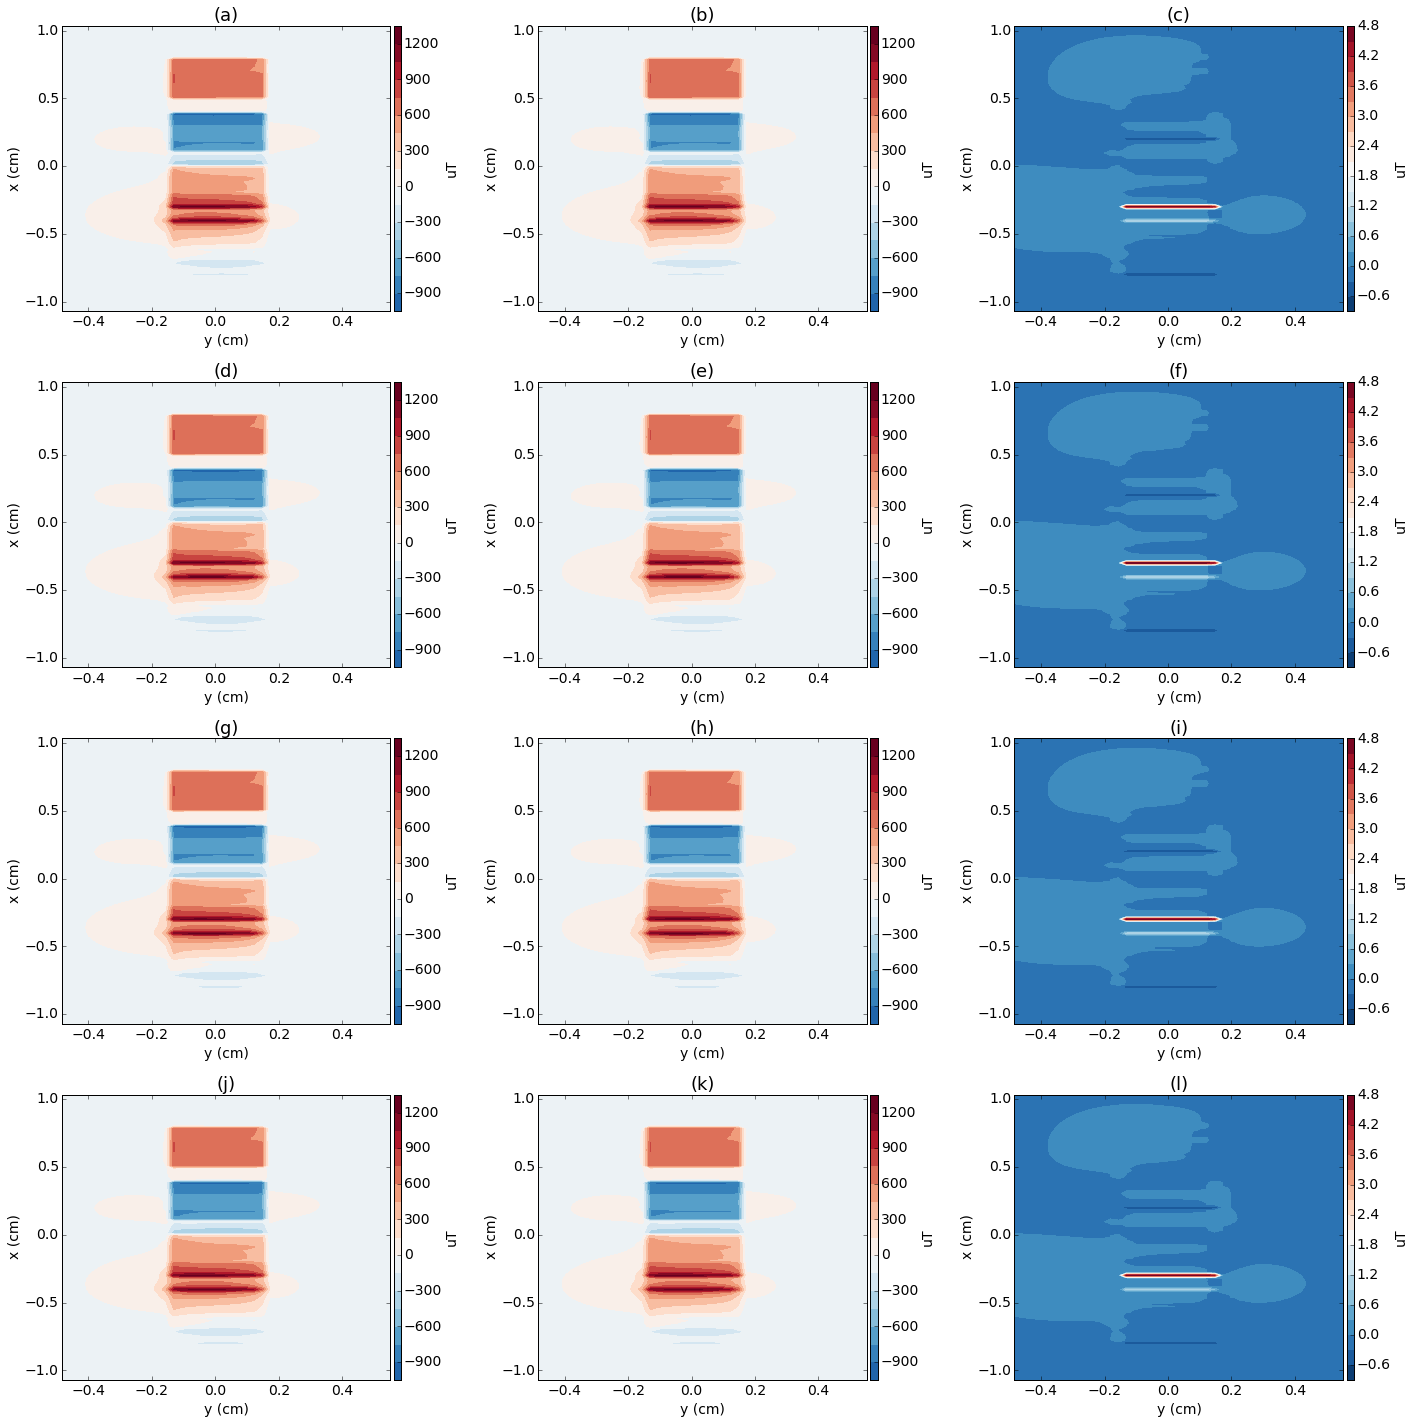

In [16]:
title_font = 18
bottom_font = 16

labels = ['(a)', '(b)', '(c)',
          '(d)', '(e)', '(f)',
          '(g)', '(h)', '(i)',
          '(j)', '(k)', '(l)']

mpl.close('all')
mpl.figure(figsize=(20,20), tight_layout=True)

for i in range(len(h)):

    mpl.subplot(len(h),3,1+3*i)

    ranges = 0.001*np.max(np.abs([Bp[i].max(), Bp[i].min(),
                                  Ba[i].max(),Ba[i].min()]))

    mpl.title(labels[3*i], fontsize=title_font)
    nlevels = mpl.contourf(100.*y0, 100.*x0, 0.001*Bp[i], (Nx, Ny), 20, cmap=mpl.cm.RdBu_r,
                vmin=-ranges, vmax=ranges)
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.xlabel('y (cm)')
    mpl.ylabel('x (cm)')

    mpl.subplot(len(h),3,1+3*i+1)

    mpl.title(labels[3*i+1], fontsize=title_font)
    mpl.contourf(100.*y0, 100.*x0, 0.001*Ba[i], (Nx, Ny), nlevels, cmap=mpl.cm.RdBu_r,
                vmin=-ranges, vmax=ranges)
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.xlabel('y (cm)')
    mpl.ylabel('x (cm)')

    mpl.subplot(len(h),3,1+3*i+2)
    mpl.title(labels[3*i+2], fontsize=title_font)
    mpl.contourf(100.*y0, 100.*x0, 0.001*(Ba[i] - Bp[i]), (Nx, Ny), 20, cmap=mpl.cm.RdBu_r)
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.xlabel('y (cm)')
    mpl.ylabel('x (cm)')

#mpl.savefig('comp_punctual_averaged_10x10_2.png')
mpl.show()

** Figure 1:** (a), (d) and (g) Magnetic data that would be measured by an infinitesimal sensor. (b), (e) and (h) Magnetic data that would be measured by a finite sensor with effective area 3 $\mu$m $\times$ 3 $\mu$m. The data shown in (a) and (b) are located at a distance $h$ = 10 $\mu$m, the data shown in (d) and (e) are located at a distance $h$ = 300 $\mu$m and the data shown in (g) and (h) are located at a distance $h$ = 300 $\mu$m.  (c), (f) and (i) Difference between the data that would be measured by a finite and an infinitesimal sensor at the same $h$. All values are in nT.

### Conclusions